In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random

from matplotlib.colors import ListedColormap
from sklearn import datasets
%matplotlib inline
from tqdm import tqdm

import seaborn as sns
from sklearn.metrics import r2_score
from src import func as fn

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
source = 'src/train.csv'
train = pd.read_csv(source)

feature_names = ['age','years_of_experience','lesson_price','qualification','physics','chemistry','biology','english','geography','history']
feature_names_short = ['qualification']
target_name = 'mean_exam_points'
qt = ['age', 'years_of_experience', 'lesson_price', 'qualification']
ct = ['physics','chemistry','biology','english','geography','history']

In [4]:
X = np.array(train[feature_names])
X_short = np.array(train[feature_names_short])
y = np.array(train[target_name])


In [5]:
X

array([[4.00e+01, 0.00e+00, 1.40e+03, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [4.80e+01, 4.00e+00, 2.85e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.90e+01, 0.00e+00, 1.20e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.40e+01, 1.00e+00, 1.25e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.30e+01, 3.00e+00, 1.10e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.50e+01, 0.00e+00, 1.45e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [6]:
X_pandas = train[feature_names]
X_pandas.describe()
quantitative = X_pandas[qt]
category = X_pandas[ct]


In [7]:
X_pandas.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_pandas.count()

age                    10000
years_of_experience    10000
lesson_price           10000
qualification          10000
physics                10000
chemistry              10000
biology                10000
english                10000
geography              10000
history                10000
dtype: int64

## Grath

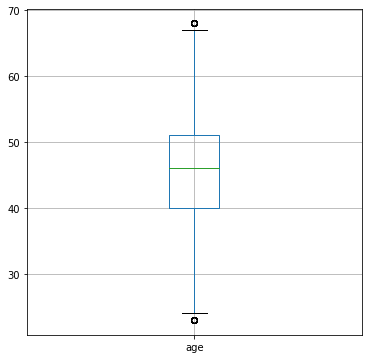

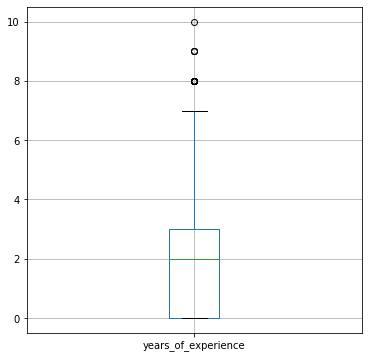

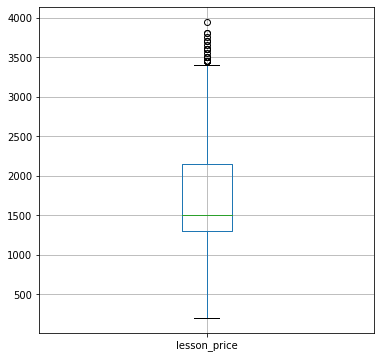

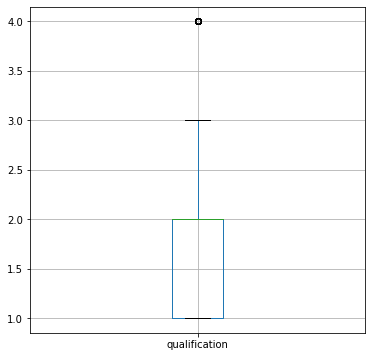

In [8]:
for i in quantitative:
    plt.figure(figsize=(6,6))
    X_pandas[i].plot.box(grid=True)

In [9]:
quantitative.head()

,age,years_of_experience,lesson_price,qualification
0,40.0,0.0,1400.0,1.0
1,48.0,4.0,2850.0,3.0
2,39.0,0.0,1200.0,1.0
3,46.0,5.0,1400.0,1.0
4,43.0,1.0,1500.0,1.0


In [10]:
quantitative[quantitative['lesson_price']>3400]

,age,years_of_experience,lesson_price,qualification
1072,50.0,5.0,3450.0,3.0
1583,50.0,6.0,3700.0,3.0
1701,58.0,6.0,3600.0,3.0
1711,53.0,5.0,3600.0,3.0
2211,42.0,4.0,3600.0,3.0
2689,40.0,3.0,3450.0,3.0
3207,52.0,6.0,3950.0,3.0
3368,58.0,6.0,3450.0,3.0
3393,62.0,6.0,3750.0,4.0
3664,52.0,5.0,3600.0,3.0


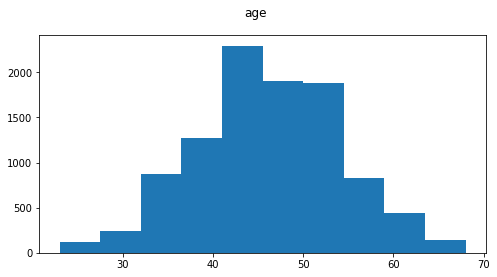

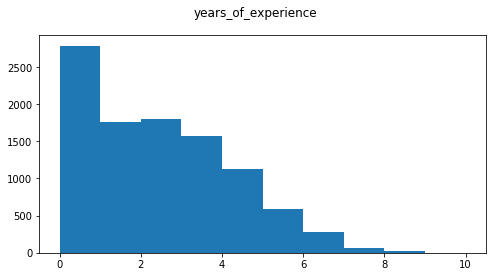

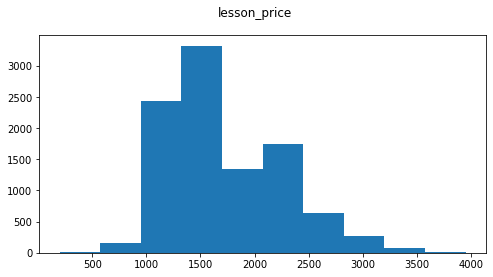

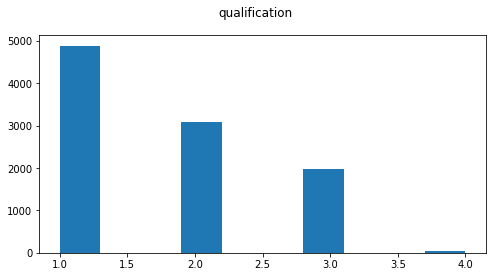

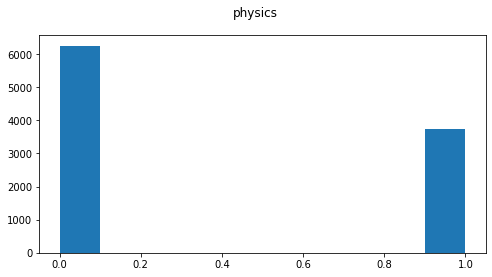

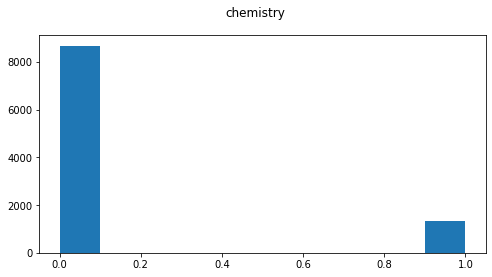

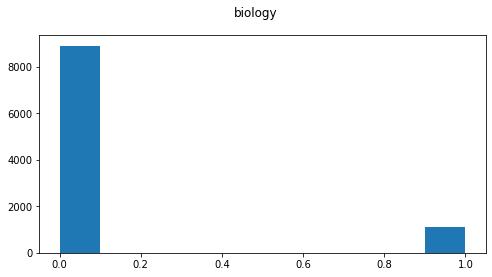

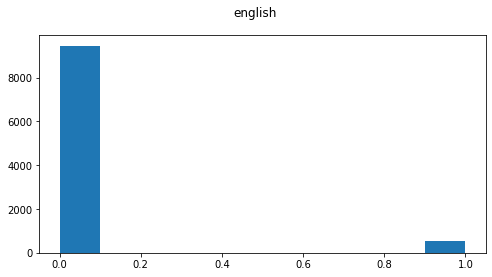

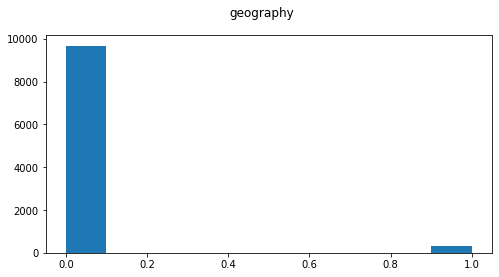

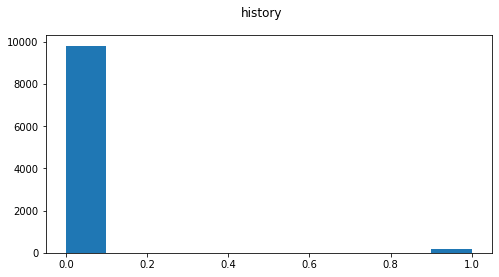

In [11]:
index = 0
for i in X.T:
    plt.figure(figsize = (8,4))
    plt.hist(i)
    plt.suptitle(feature_names[index])
    index += 1

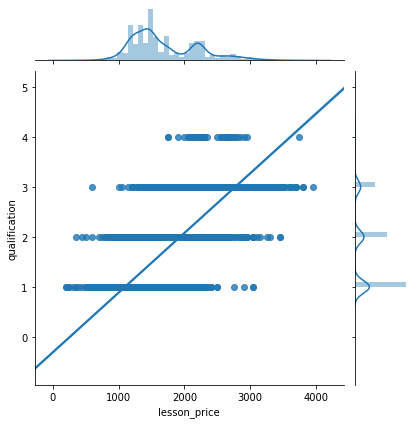

In [12]:
grid = sns.jointplot(quantitative['lesson_price'], quantitative['qualification'], kind = 'reg')

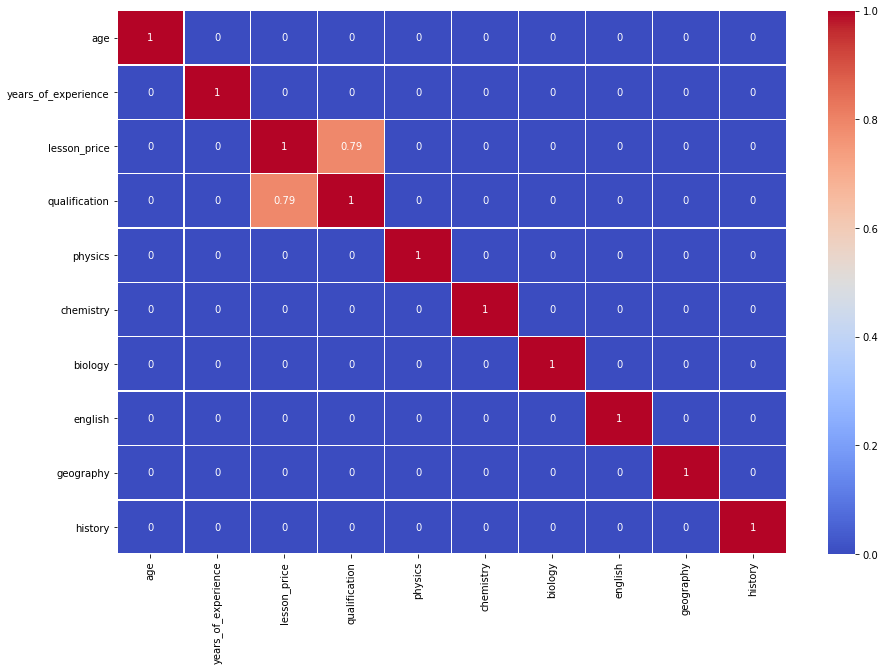

In [13]:
plt.figure(figsize = (15,10))

corr_matrix = X_pandas.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.show()

In [14]:
category = X_pandas[['physics','chemistry','biology','english','geography','history']]

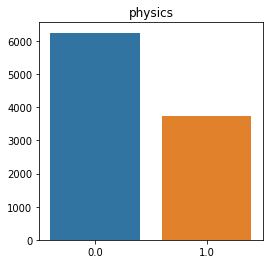

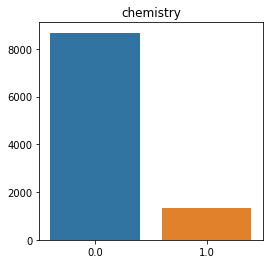

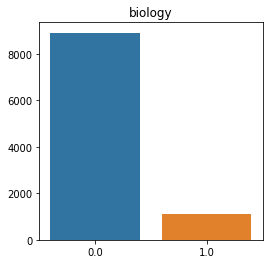

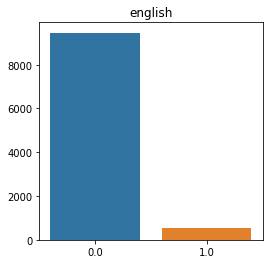

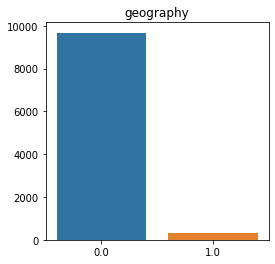

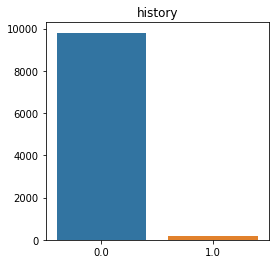

In [15]:
for i in category:
    plt.figure(figsize=(4,4))
    counts = category[i].value_counts()
    sns.barplot(counts.index, counts.values)
    plt.title(i)

Найдем показатели для каждого параметра используя градиентный спуск

Text(0.5, 1.0, 'with normalization')

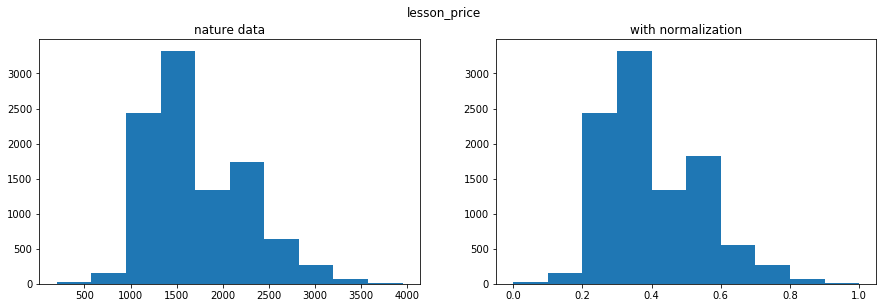

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 4.5))
fig.suptitle(feature_names[2])
ax1.hist(X[:,2])
ax1.set_title('nature data')
ax2.hist(fn.normalise(X[:,2]))
ax2.set_title('with normalization')


In [17]:
X[:,2] = fn.normalise(X[:,2])

In [18]:
category = np.array(train[['physics','chemistry','biology','english','geography','history']])
category

array([[1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [19]:
X[:,2]

array([0.32      , 0.70666667, 0.26666667, ..., 0.28      , 0.24      ,
       0.33333333])

## START: logistic and stochastic regression

age
параметры - [nan nan], Ошибка - [1832.5398, 7.294517648452965e+99, 3.483462050475363e+196, 1.6635106585389553e+293, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
--------------------------------------------------
years_of_experience
параметры - [61.22339913  1.56905543], Ошибка - [4066.28315, 766.5584198080502, 434.5956657164674, 289.0755300606692, 225.2849048607493, 197.3214629284126, 185.0633280966482, 179.6898168558895, 177.33426901350995, 176.30168428647855, 175.84903747569615, 175.6506139178535, 175.56363239634703, 175.52550292640987, 175.50878838230318, 175.50146134667546, 175.49824944626425, 175.49684146836213, 175.49622426311947, 175.49595370325414, 175.49583509985342, 175.49578310852553, 175.49576031745755, 175.49575032669938, 175.49574594712192, 175.49574402727777, 175.49574318568935, 175.49574281676823, 175.4957426550469, 175.4957425841543

C:\Users\Alfa\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\Alfa\group\8. Algoritm\cource_work\src\func.py:18: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)
C:\Users\Alfa\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Alfa\group\8. Algoritm\cource_work\src\func.py:58: RuntimeWarning: invalid value encountered in subtract
  W -= (alpha * (1/len(X_new[0]) * 2 * np.sum(X_new * (y_pred - y), axis=1)))



--------------------------------------------------
lesson_price
параметры - [46.20671574 45.77317315], Ошибка - [4168.641532342222, 503.27464197622044, 163.08583434625817, 130.41104028092403, 126.21180767704826, 124.6846973044771, 123.44242483445548, 122.26299158099594, 121.12465976840915, 120.02424944026812, 118.96033542590989, 117.9316923134878, 116.93714941683044, 115.9755761626784, 115.04587957746249, 114.14700293142177, 113.27792452698306, 112.43765653648968, 111.62524387930875, 110.83976313624218, 110.08032149993218, 109.34605576006244, 108.63613132220037, 107.94974125916514, 107.28610539384358, 106.64446941241114, 106.02410400694997, 105.42430404648984, 104.84438777552924, 104.28369603912633, 103.74159153367792, 103.21745808253633, 102.71069993563924, 102.2207410923575, 101.747024646791, 101.28901215476805, 100.84618302182919, 100.4180339114998, 100.00407817317857, 99.60384528899199]
--------------------------------------------------
qualification
параметры - [42.03401725 12.96

[array([nan, nan]),
 array([61.22339913,  1.56905543]),
 array([46.20671574, 45.77317315]),
 array([42.03401725, 12.96488354]),
 array([62.36940748,  5.25541328]),
 array([64.23169744,  0.80848996]),
 array([64.21340673,  1.14647569]),
 array([64.27392479,  1.22233328]),
 array([64.29105117,  1.53603091]),
 array([64.32472518,  0.81263043])]

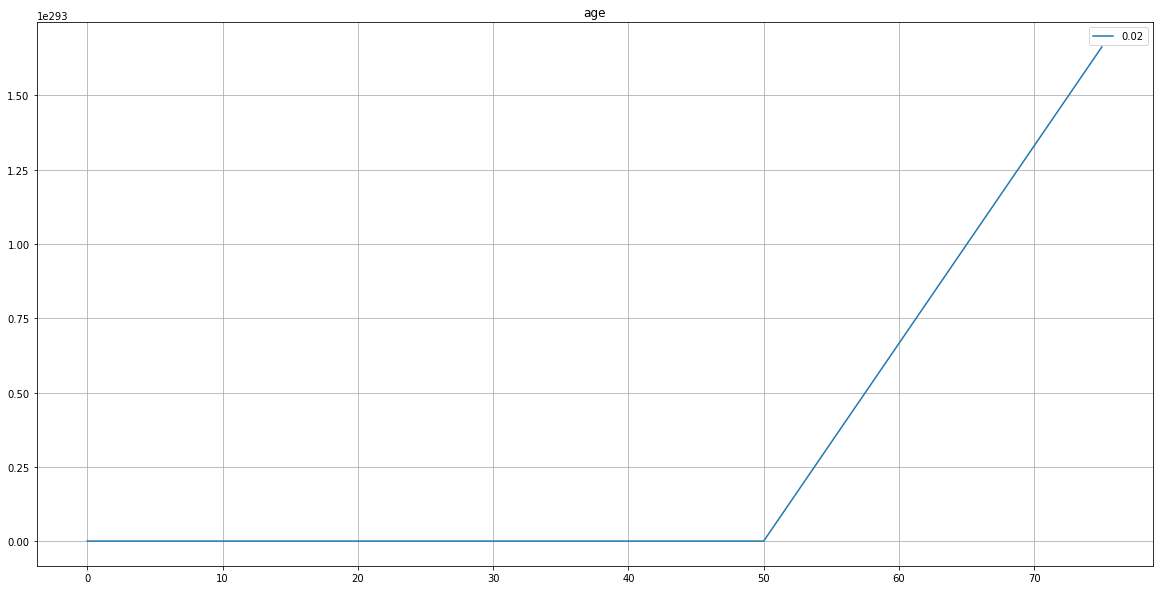

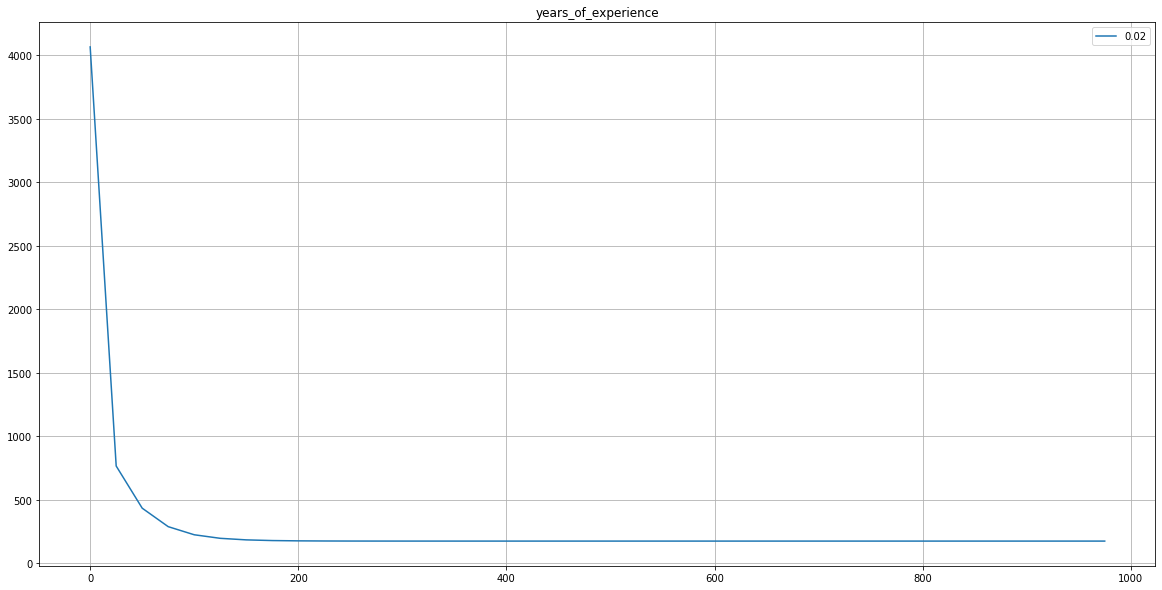

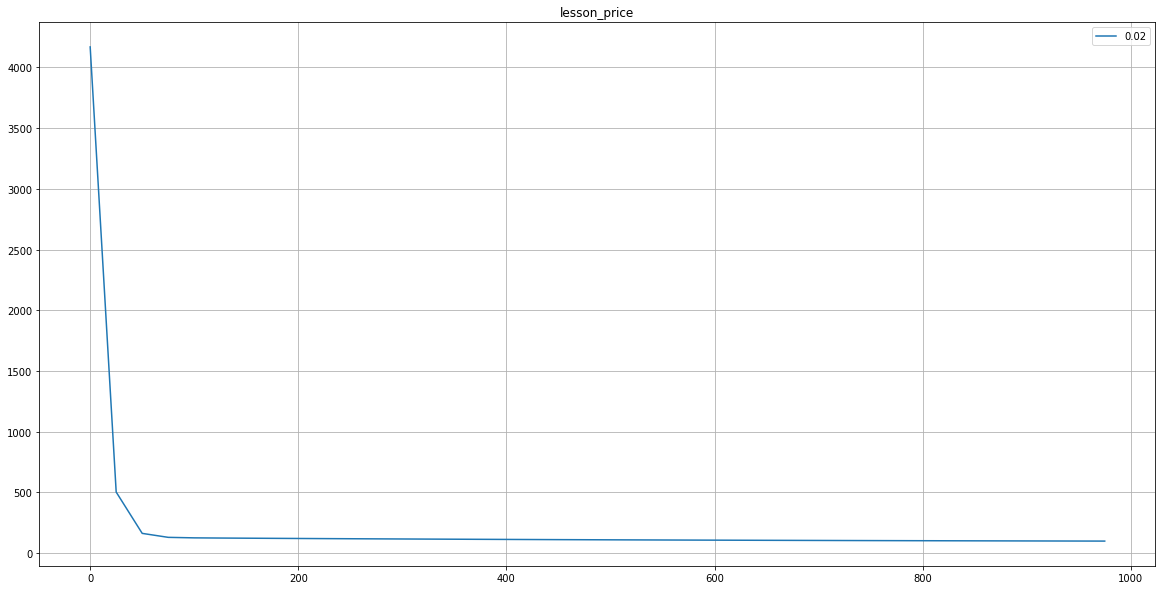

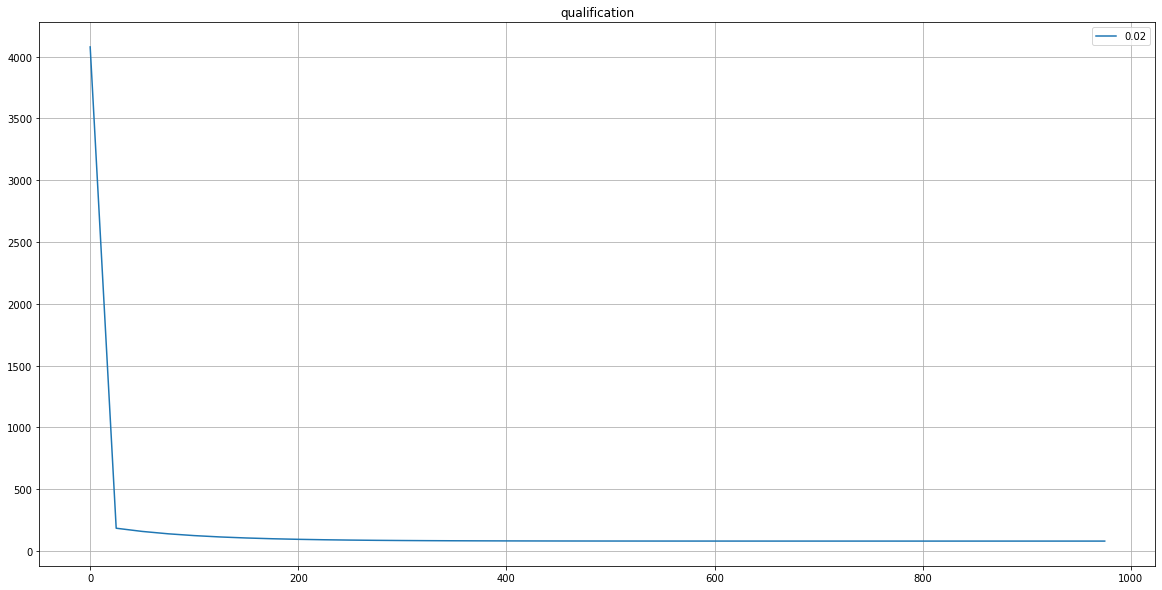

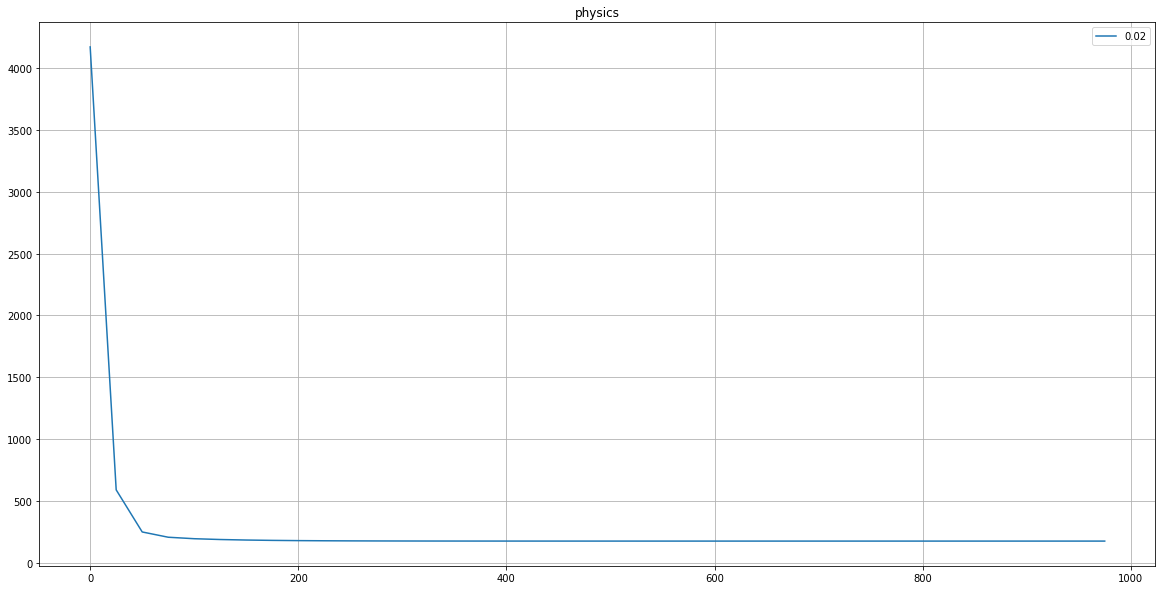

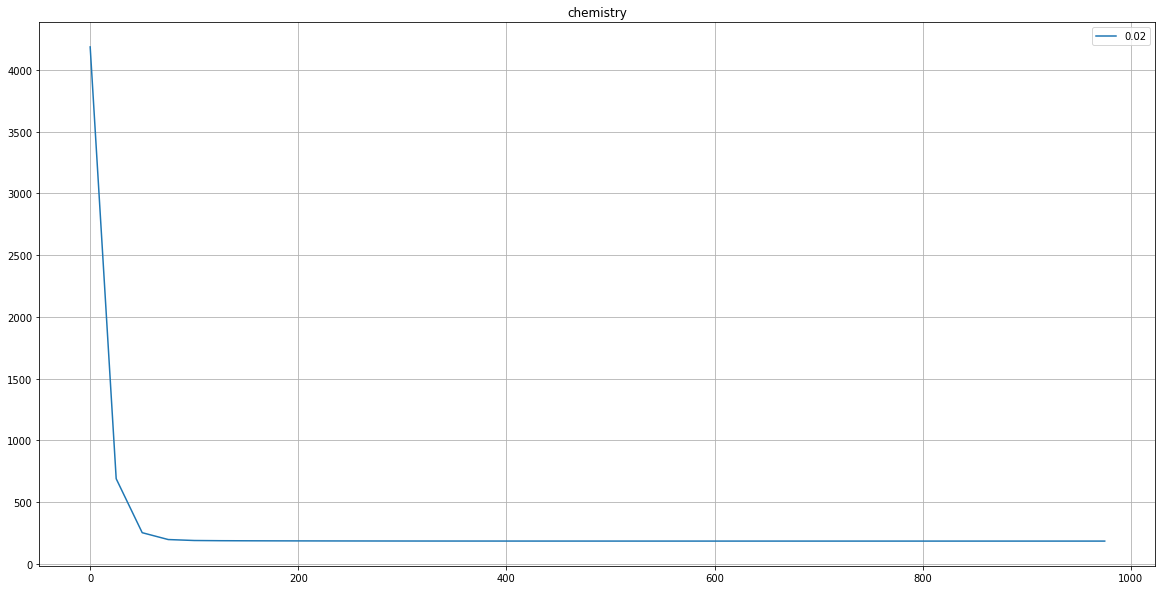

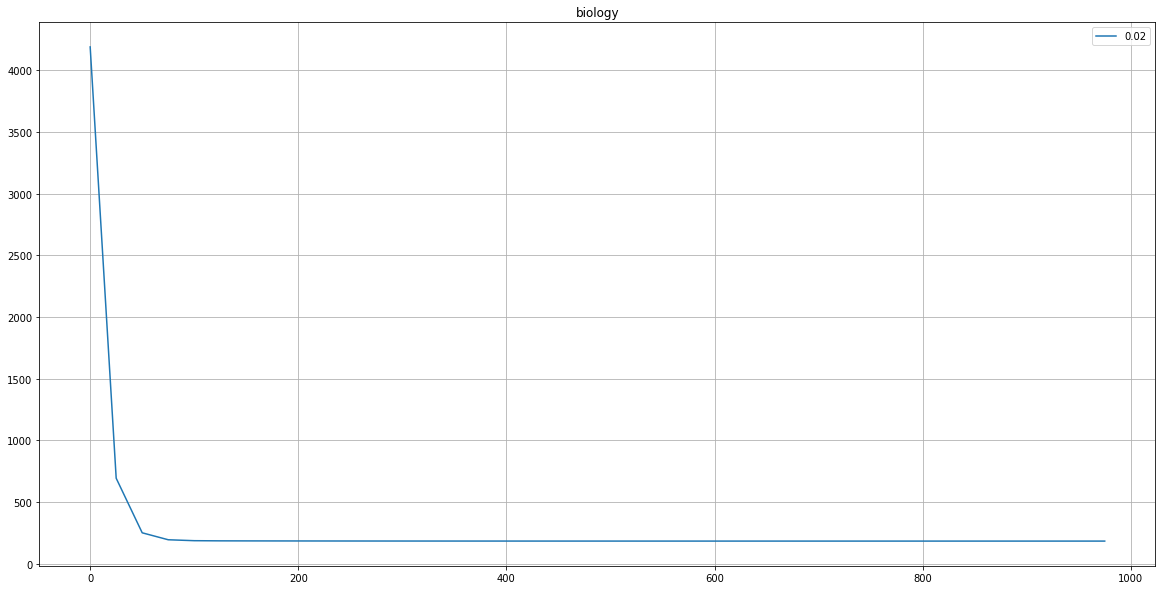

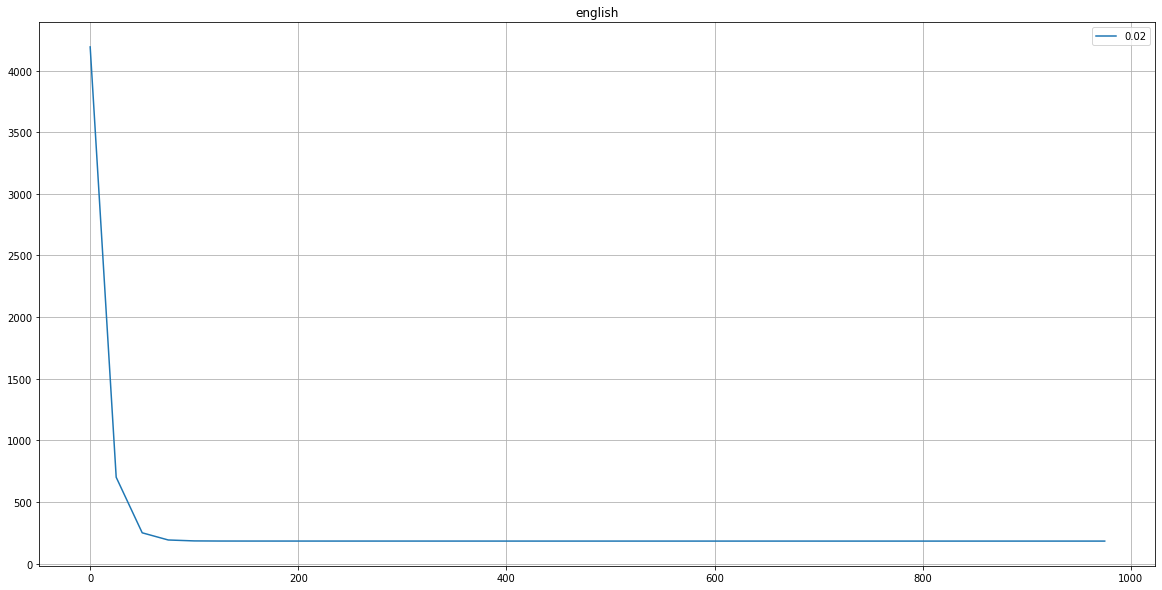

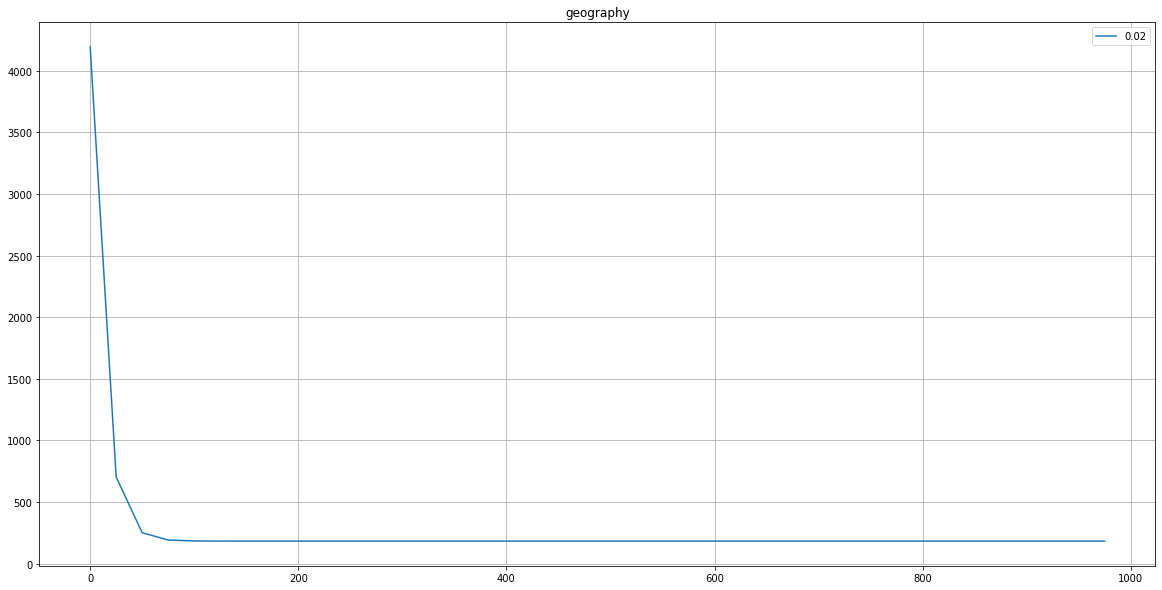

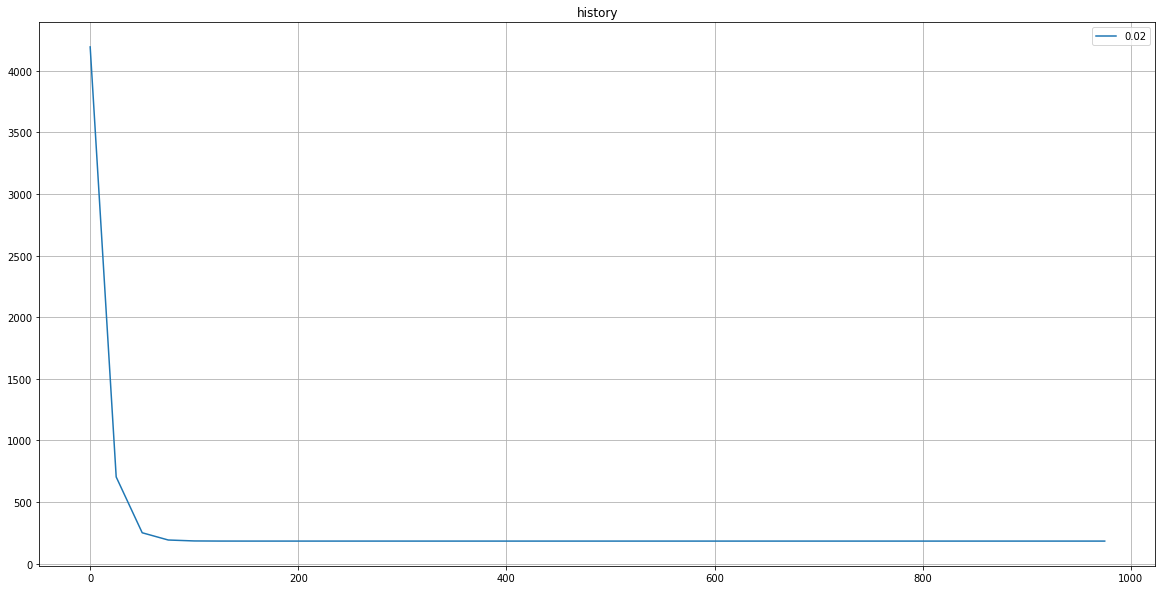

In [20]:
fn.weight_searching(X, y, feature_names)

In [21]:
category = np.array(X_pandas[['biology']])
category

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [22]:
for x0 in range(0,100,5):
    print(fn.model_predict(X_short, y, x0))

(1853.1105373424105, -9.113727533065257)
(1456.8512392518146, -6.951061846063418)
(1110.591941161219, -5.061281325090843)
(814.3326430706231, -3.4443859701475317)
(568.0733449800273, -2.100375781233486)
(371.81404688943155, -1.0292507583487036)
(225.55474879883573, -0.23101090149318582)
(129.29545070823997, 0.2943437893330676)
(83.03615261764418, 0.5468133141300568)
(86.77685452704836, 0.5263976728977819)
(140.51755643645254, 0.23309686563624266)
(244.2582583458568, -0.33308910765456123)
(397.99896025526095, -1.172160246974629)
(601.7396621646651, -2.284116552323961)
(855.4803640740693, -3.668958023702557)
(1159.2210659834734, -5.326684661110418)
(1512.9617678928778, -7.257296464547544)
(1916.702469802282, -9.460793434013933)
(2370.443171711687, -11.93717556950959)
(2874.1838736210902, -14.686442871034503)


In [23]:
fn.model_predict2(X_short,y)

(array([[1., 3., 1., ..., 1., 1., 1.]]),
 array([55.04451343, 80.88326911, 55.04451343, ..., 55.04451343,
        55.04451343, 55.04451343]),
 0.5714798241063965)

In [24]:
feature_names_1 = ['years_of_experience','qualification','physics','chemistry','biology','english','geography']
X_exsp = X_short = np.array(train[feature_names_1])
for x0 in range(50,100):
    print(fn.model_predict(category, y, x0))

(385.59783991071885, -1.1044786112912437)
(358.13961446828085, -0.9546197631166704)
(332.68138902584286, -0.8156763215832679)
(309.2231635834048, -0.6876482866910354)
(287.7649381409668, -0.5705356584399741)
(268.30671269852877, -0.4643384368300829)
(250.8484872560908, -0.3690566218613627)
(235.39026181365276, -0.2846902135338125)
(221.9320363712148, -0.21123921184743333)
(210.47381092877677, -0.14870361680222466)
(201.01558548633875, -0.09708342839818651)
(193.55736004390073, -0.056378646635318885)
(188.09913460146274, -0.02658927151362178)
(184.64090915902472, -0.0077153030330952)
(183.18268371658672, 0.00024325880626041574)
(183.7244582741487, -0.0027135859955542685)
(186.26623283171068, -0.016585837438539475)
(190.80800738927266, -0.0413734955226952)
(197.3497819468347, -0.0770765602480219)
(205.89155650439668, -0.12369503161451867)
(216.43333106195865, -0.1812289096221864)
(228.9751056195207, -0.24967819427102467)
(243.51688017708264, -0.329042885561033)
(260.0586547346447, -0.419

In [25]:
np.random.seed(27)
gd_weights, gd_weights_history, gd_errors_history = fn.fit_linear_model(
    X_short, y, batch_size=X.shape[0])

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6227.83it/s]


In [26]:
print(gd_weights, gd_errors_history)

[ 2.71915265 26.9320978  13.58892     6.38834746  6.90931832  5.01253198
  3.36162183] [4024.0135378657005, 2962.0085243917447, 2255.778255047555, 1782.960970395314, 1463.4431385812074, 1244.763959150279, 1092.5625931655918, 984.3258425976657, 905.2959649500237, 845.7922916448008, 799.4581788229407, 762.1135877201011, 731.0040501483677, 704.3090692138481, 680.8203219546665, 659.7309990998706, 640.497885934959, 622.7510541104829, 606.2347166860599, 590.7684813427524, 576.2219559691897, 562.4980950817571, 549.5222687546998, 537.2350784941168, 525.5876269753714, 514.5383952517452, 504.05117340180976, 494.0936819349395, 484.636646516967, 475.6531705520602, 467.11830381175156, 459.00874042188485, 451.30260250686473, 443.97928083921727, 437.01931369426364, 430.4042915600748, 424.116779576895, 418.1402523469877, 412.4590375687555, 407.0582661374664, 401.9238271346341, 397.0423266401739, 392.4010496382812, 387.98792451001566, 383.7914897524002, 379.80086266137624, 376.0057097811426, 372.396218

In [27]:
np.random.seed(27)
sgd_weights, sgd_weights_history, sgd_errors_history = fn.fit_linear_model(
    X_short, y, batch_size=1)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:17<00:00,  3.89it/s]


In [ ]:
print(sgd_weights)

## START: Decision Trees

In [9]:
quantitative = np.array(quantitative)
category = np.array(category)

In [10]:
# Разобьем выборку на обучающую и тестовую

from sklearn import model_selection

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, 
                                                                                     y, 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)


In [11]:
# Построим дерево по обучающей выборке
my_tree = fn.build_tree(train_data, train_labels)

In [12]:
# Получим ответы для обучающей выборки 
train_answers = fn.predict(train_data, my_tree)

In [13]:
# И получим ответы для тестовой выборки
answers = fn.predict(test_data, my_tree)

In [14]:
# Точность на обучающей выборке
train_accuracy = fn.accuracy_metric(train_labels, train_answers)
train_accuracy
r2_score(train_labels, train_answers)

0.7143835594206819

In [15]:
# Точность на тестовой выборке
test_accuracy = fn.accuracy_metric(test_labels, answers)
test_accuracy
r2_score(test_labels, answers)

0.6127207473698542

## FINISH: Decision Trees

## Gradient Boosting Decision Trees

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes

In [17]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0]
                          for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    return (y - z)

In [18]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [19]:
X_train, X_valid = train_test_split(
    X, train_size=0.8, random_state=1
)
y_train, y_valid = train_test_split(
    y, train_size=0.8, random_state=1
)

## Код ниже, очень долгий!

In [20]:
eta = 1

params_grid = {
    "n_trees": [5, 10, 20, 30, 40, 50],
    "max_depth": [2, 3, 4, 5, 6, 7, 8]
}
errors_history_params = []

for n_trees in params_grid["n_trees"]:
    errors_by_tree = []
    coefs = [1] * n_trees

    for depth in params_grid["max_depth"]:
        trees, train_errors, test_errors = gb_fit(
            n_trees, depth, X_train, X_valid, y_train, y_valid, coefs, eta
        )
        errors_by_tree.append(test_errors[-1])
    errors_history_params.append(errors_by_tree)

In [21]:
scores = pd.DataFrame(
    train,
    index=params_grid["n_trees"],
    columns=params_grid["max_depth"])

In [22]:
%%time
tree = fn.DecisionTreeRegressor(max_depth=3, num_leaves=8)
tree.fit(X, y)

Wall time: 107 ms


In [23]:
trees, train_errors, test_errors = fn.gb_nvtrees_fit(
    5, 2, X_train, X_valid, y_train, y_valid, coefs, eta
)

## END: Gradient Boosting Decision Trees

## Teach test data

In [ ]:
test = pd.read_csv('src/test.csv')


X_test = test[feature_names]
y_train_preds = fn.dt_model.predict(X_test)


In [ ]:
submit = pd.DataFrame({
    'Id':test['Id'],
    'mean_exam_points': y_train_preds
})

In [ ]:
submit

In [ ]:
submit.to_csv('submission.csv', index=False)